In [187]:
import numpy as np # linear algebra
import pandas as pd # data processing

In [188]:
df = pd.read_csv("/content/Mobile Price Prediction Datatset.csv")
df.head()

,Unnamed: 0,Brand me,Ratings,RAM,ROM,Mobile_Size,Primary_Cam,Selfi_Cam,Battery_Power,Price
0,0,"LG V30+ (Black, 128 )",4.3,4.0,128.0,6.00,48,13.0,4000,24999
1,1,I Kall K11,3.4,6.0,64.0,4.50,48,12.0,4000,15999
2,2,Nokia 105 ss,4.3,4.0,4.0,4.50,64,16.0,4000,15000
3,3,"Samsung Galaxy A50 (White, 64 )",4.4,6.0,64.0,6.40,48,15.0,3800,18999
4,4,"POCO F1 (Steel Blue, 128 )",4.5,6.0,128.0,6.18,35,15.0,3800,18999


In [189]:
df.shape

(836, 10)

In [190]:
df.columns

Index(['Unnamed: 0', 'Brand me', 'Ratings', 'RAM', 'ROM', 'Mobile_Size',
       'Primary_Cam', 'Selfi_Cam', 'Battery_Power', 'Price'],
      dtype='object')

# taking off or Removing the Unnamed and brandme columns

In [191]:
df = df.drop(['Unnamed: 0','Brand me'] , axis=1)
df.head()

,Ratings,RAM,ROM,Mobile_Size,Primary_Cam,Selfi_Cam,Battery_Power,Price
0,4.3,4.0,128.0,6.00,48,13.0,4000,24999
1,3.4,6.0,64.0,4.50,48,12.0,4000,15999
2,4.3,4.0,4.0,4.50,64,16.0,4000,15000
3,4.4,6.0,64.0,6.40,48,15.0,3800,18999
4,4.5,6.0,128.0,6.18,35,15.0,3800,18999


#finding the relation between the mobile_size and price

In [192]:
import matplotlib.pyplot as plt

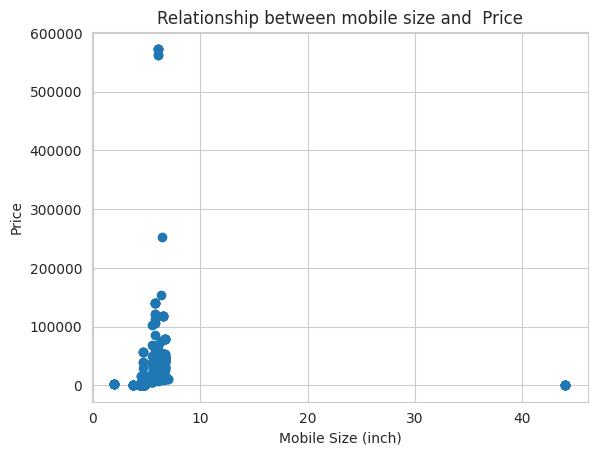

In [193]:
plt.scatter(df['Mobile_Size'], df['Price'])
plt.xlabel("Mobile Size (inch)")
plt.ylabel("Price")
plt.title("Relationship between mobile size and  Price")
plt.show()

Frome above we can see that there are some outliers when it comes to mobile size. Idealy mobile size are less than 10 inch and above 3 inches.

In [194]:
df[(df['Mobile_Size'] > 10) | (df['Mobile_Size'] < 3)]

,Ratings,RAM,ROM,Mobile_Size,Primary_Cam,Selfi_Cam,Battery_Power,Price
21,3.7,6.0,32.0,2.0,64,13.0,1550,1699
26,3.8,12.0,24.0,2.0,64,NaN,1550,1690
96,4.3,NaN,64.0,2.0,64,NaN,3500,1625
160,3.8,6.0,32.0,44.0,48,8.0,3000,890
192,4.2,4.0,2.0,2.0,48,NaN,3000,2025
207,3.2,6.0,64.0,44.0,48,NaN,3500,899
242,3.2,6.0,64.0,44.0,48,NaN,3500,899
307,3.7,6.0,32.0,2.0,64,NaN,1550,1699
363,4.1,6.0,32.0,44.0,48,5.0,3000,970
423,4.1,6.0,32.0,44.0,48,15.0,3000,935


In [195]:
# remove the rows with Mobile Size outliers
df = df[(df['Mobile_Size'] < 10) | (df['Mobile_Size'] > 3)]
df.shape

(834, 8)

In [196]:
df.head()

,Ratings,RAM,ROM,Mobile_Size,Primary_Cam,Selfi_Cam,Battery_Power,Price
0,4.3,4.0,128.0,6.00,48,13.0,4000,24999
1,3.4,6.0,64.0,4.50,48,12.0,4000,15999
2,4.3,4.0,4.0,4.50,64,16.0,4000,15000
3,4.4,6.0,64.0,6.40,48,15.0,3800,18999
4,4.5,6.0,128.0,6.18,35,15.0,3800,18999


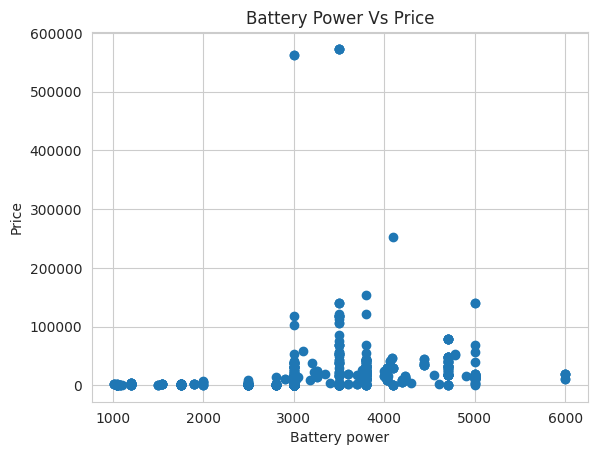

In [197]:
# finding relationship between battery power and price

plt.scatter(df['Battery_Power'], df['Price'])
plt.xlabel("Battery power")
plt.ylabel("Price")
plt.title("Battery Power Vs Price")
plt.show()

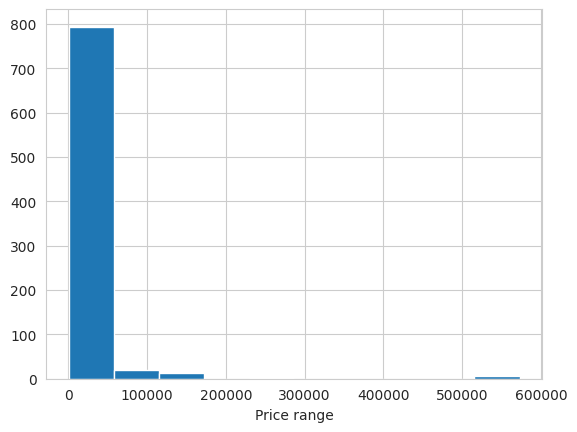

In [198]:
plt.hist(df['Price'])
plt.xlabel("Price range")
plt.show()

 from the above we can actually confirm that any price above 250,000 is an autlier

In [199]:
#from the above we can actually confirm that any price above 250,000 is an outlier

# removing the outlier
df = df[df['Price'] < 250000]
df.shape


(827, 8)

finding the relationship between the selfi_cam and price

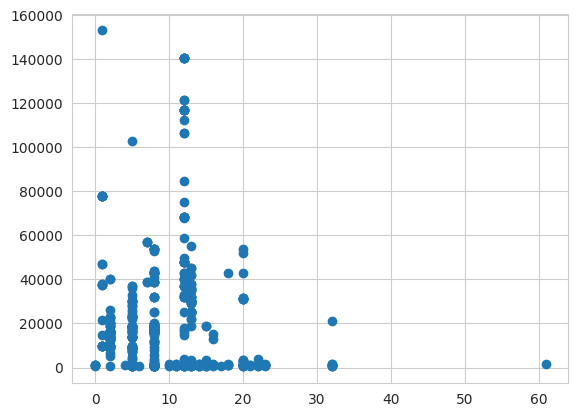

In [200]:
plt.scatter(df['Selfi_Cam'], df['Price'])
plt.show()

selfie cam pixels seems to having some *outliers*

In [201]:
df[df['Selfi_Cam'] > 30]

,Ratings,RAM,ROM,Mobile_Size,Primary_Cam,Selfi_Cam,Battery_Power,Price
24,NaN,6.0,32.0,4.50,64,32.0,3000,649
83,NaN,6.0,32.0,4.54,48,32.0,1900,1570
211,4.2,8.0,64.0,4.77,48,32.0,3000,749
228,4.0,6.0,32.0,4.50,38,32.0,1750,999
229,3.9,8.0,64.0,4.54,64,32.0,2500,1710
253,4.0,6.0,32.0,4.50,48,32.0,3500,998
444,4.2,6.0,32.0,4.54,48,61.0,1750,1390
447,4.5,6.0,128.0,6.39,48,32.0,3000,21099
556,3.8,6.0,32.0,4.40,48,32.0,3800,930
787,NaN,6.0,32.0,4.50,64,32.0,3000,649


In [202]:
df.shape

(827, 8)

## I noticed that selfie cam column has many NA values so we need to fill that before removing the outliers if not we might loose a large part of the data set

In [203]:
df.isna().sum()

Ratings           31
RAM                7
ROM                3
Mobile_Size        0
Primary_Cam        0
Selfi_Cam        267
Battery_Power      0
Price              0
dtype: int64

In [204]:
df['Selfi_Cam'] = df['Selfi_Cam'].fillna(df['Selfi_Cam'].median())

In [205]:
df.isna().sum()

Ratings          31
RAM               7
ROM               3
Mobile_Size       0
Primary_Cam       0
Selfi_Cam         0
Battery_Power     0
Price             0
dtype: int64

In [206]:
# removing the outliers
df = df[df['Selfi_Cam'] < 30]
df.shape

(817, 8)

checking relation between ram and price

[]

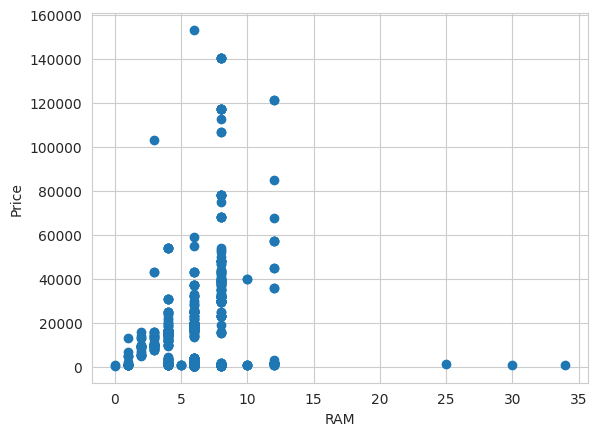

In [207]:
plt.scatter(df['RAM'] , df['Price'])
plt.xlabel("RAM")
plt.ylabel("Price")
plt.plot()

## below we can see that there are some outliers because in as much as the ram is high, the price seem to be too low which mean there was an error in the column during input so we have to remove this comums with prize less than 20,000 but the RAM is greather than 16GB

In [208]:
df[df['RAM'] > 16]

,Ratings,RAM,ROM,Mobile_Size,Primary_Cam,Selfi_Cam,Battery_Power,Price
165,3.8,25.0,25.0,4.54,48,8.0,3000,1199
190,4.0,30.0,0.0,4.50,64,8.0,3500,799
205,3.9,34.0,64.0,4.50,48,21.0,3000,955


In [209]:
# Removing Ram outliers
df = df[df['RAM'] < 16]
df.shape

(807, 8)

finding the relationship between rom and price

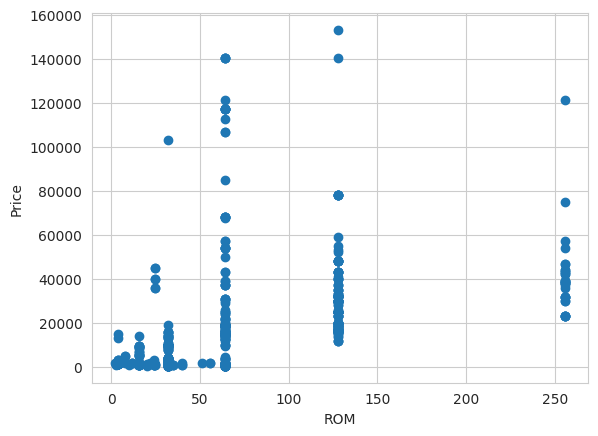

In [210]:
plt.scatter(df['ROM'], df['Price'])
plt.xlabel("ROM")
plt.ylabel("Price")
plt.show()

In [211]:
#checking the na values of rom
# ROM NA values
df.isnull().sum()

Ratings          28
RAM               0
ROM               3
Mobile_Size       0
Primary_Cam       0
Selfi_Cam         0
Battery_Power     0
Price             0
dtype: int64

In [212]:
# filling the ROM NA fields with the mode of the ROM column
df['ROM'] = df['ROM'].fillna(df['ROM'].mode()[0])
df['ROM'].isnull().sum()

0

In [213]:
# filling the ROM NA fields with the mode of the ROM column
df['ROM'] = df['ROM'].fillna(df['ROM'].mode()[0])
df['ROM'].isnull().sum()

0

Checking Relationship between rating and price

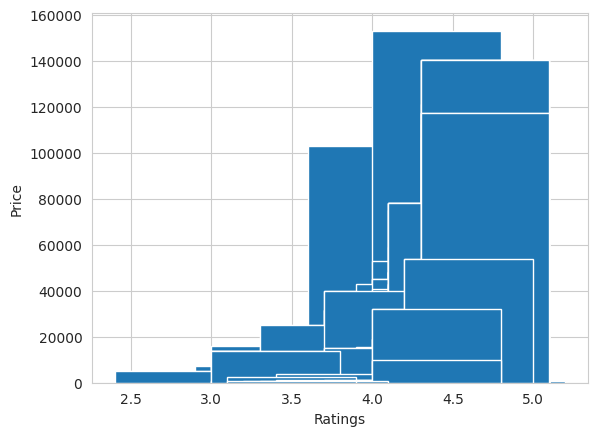

In [214]:
#filling the na values of rating
plt.bar(df['Ratings'], df['Price'])
plt.xlabel("Ratings")
plt.ylabel("Price")
plt.show()

In [215]:
 #filling the NA mode values with mode
df['Ratings'] = df['Ratings'].fillna(df['Ratings'].mode()[0])
df['Ratings'].isna().sum()

0

In [216]:
df.isna().sum()

Ratings          0
RAM              0
ROM              0
Mobile_Size      0
Primary_Cam      0
Selfi_Cam        0
Battery_Power    0
Price            0
dtype: int64

Exploratory data analysis

In [217]:

# Finding out the correlation between the features
corr = df.corr()
corr.shape

(8, 8)

<Axes: >

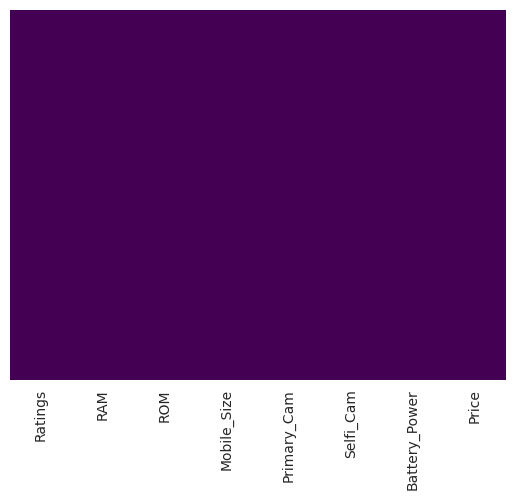

In [218]:
import seaborn as sns
# We can able to see the there is no null values
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [219]:
# Changing the Datatype
df['RAM'] = df['RAM'].astype('int64')
df['ROM'] = df['ROM'].astype('int64')
df['Selfi_Cam'] = df['Selfi_Cam'].astype('int64')


<Axes: >

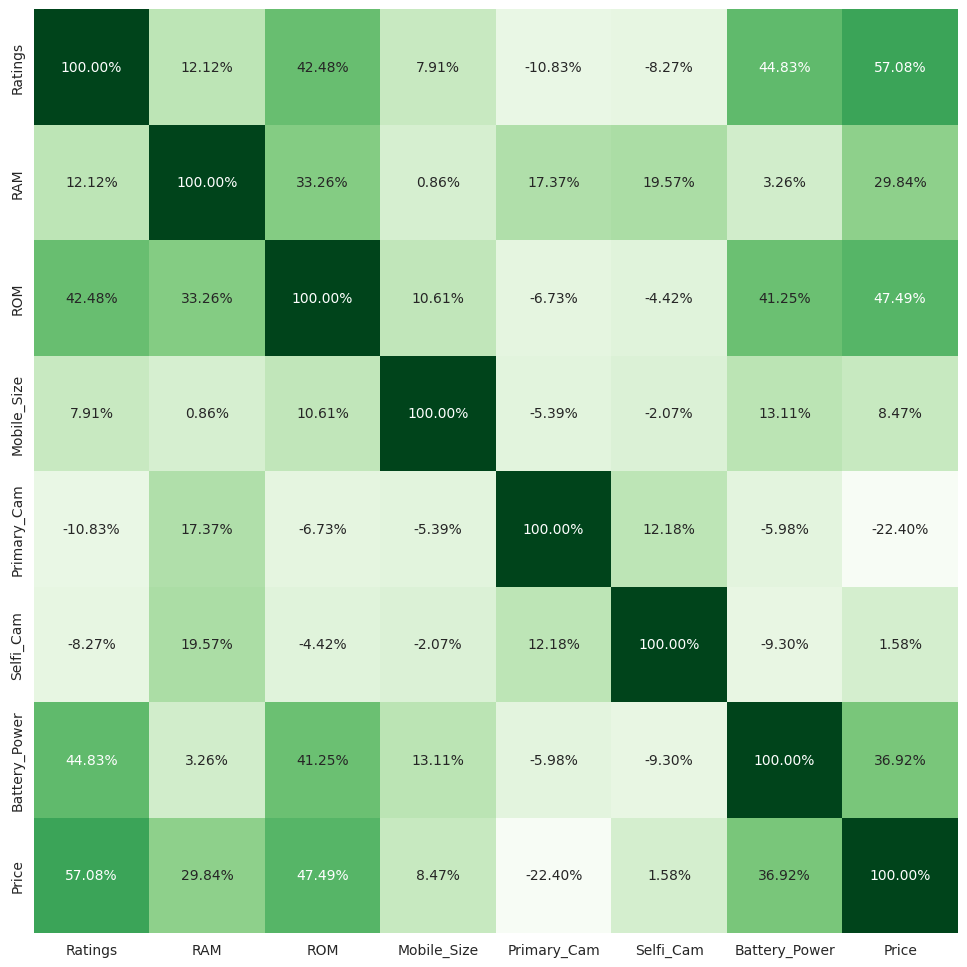

In [220]:
# Plotting the heatmap of correlation between features
plt.figure(figsize=(12,12))
sns.heatmap(corr, cbar=False, square= True, fmt='.2%', annot=True, cmap='Greens')

<Axes: xlabel='Ratings', ylabel='count'>

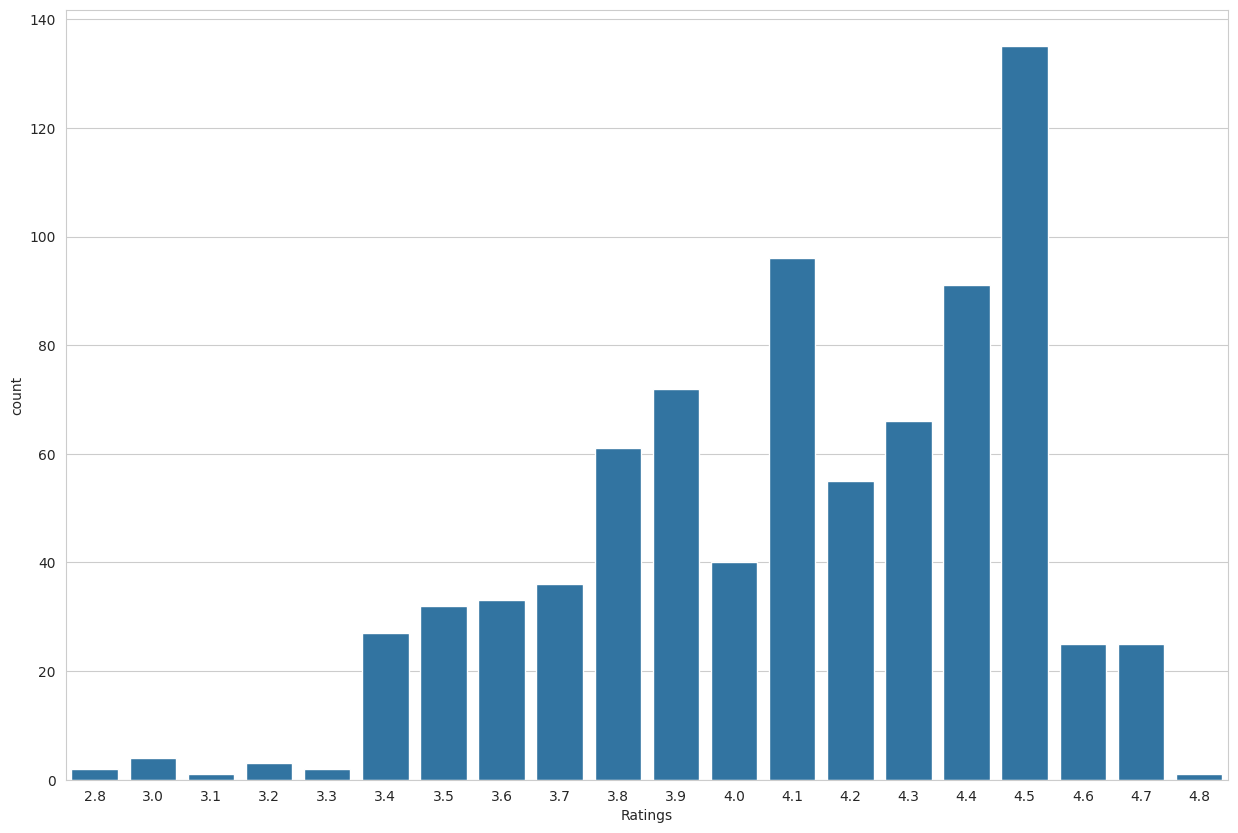

In [221]:
plt.figure(figsize=(15,10))
sns.set_style('whitegrid')
sns.countplot(x='Ratings',data=df)

<Axes: xlabel='RAM', ylabel='count'>

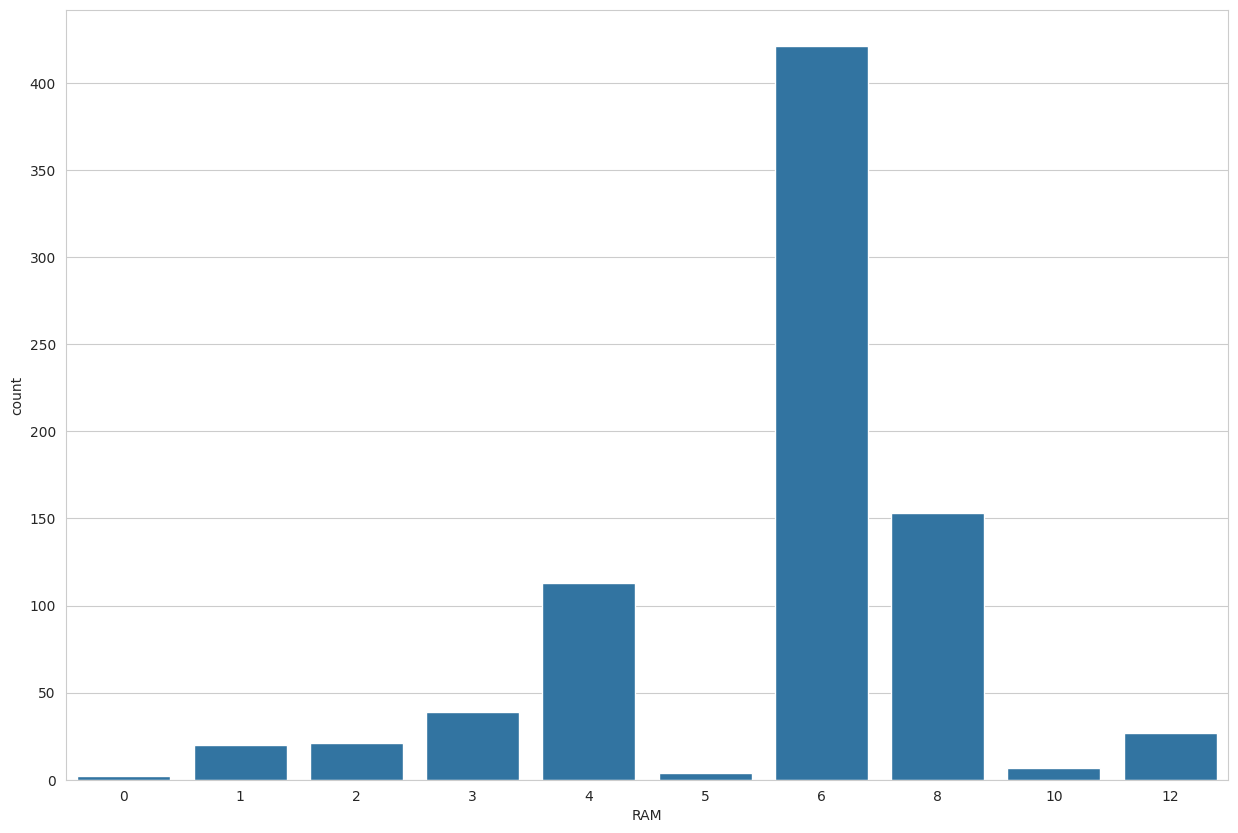

In [222]:
plt.figure(figsize=(15,10))
sns.set_style('whitegrid')
sns.countplot(x='RAM',data=df)

<Axes: xlabel='ROM', ylabel='count'>

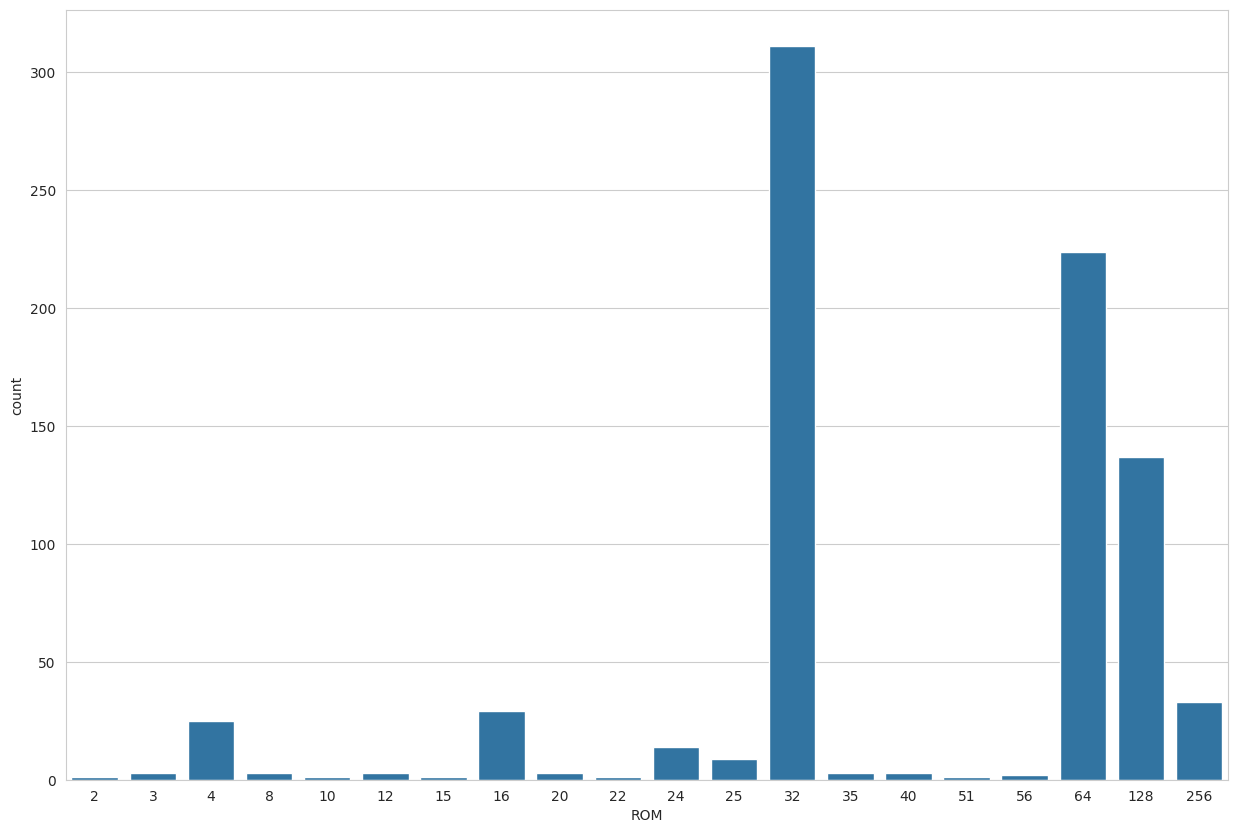

In [223]:
plt.figure(figsize=(15,10))
sns.set_style('whitegrid')
sns.countplot(x='ROM',data=df)

<Axes: xlabel='Selfi_Cam', ylabel='count'>

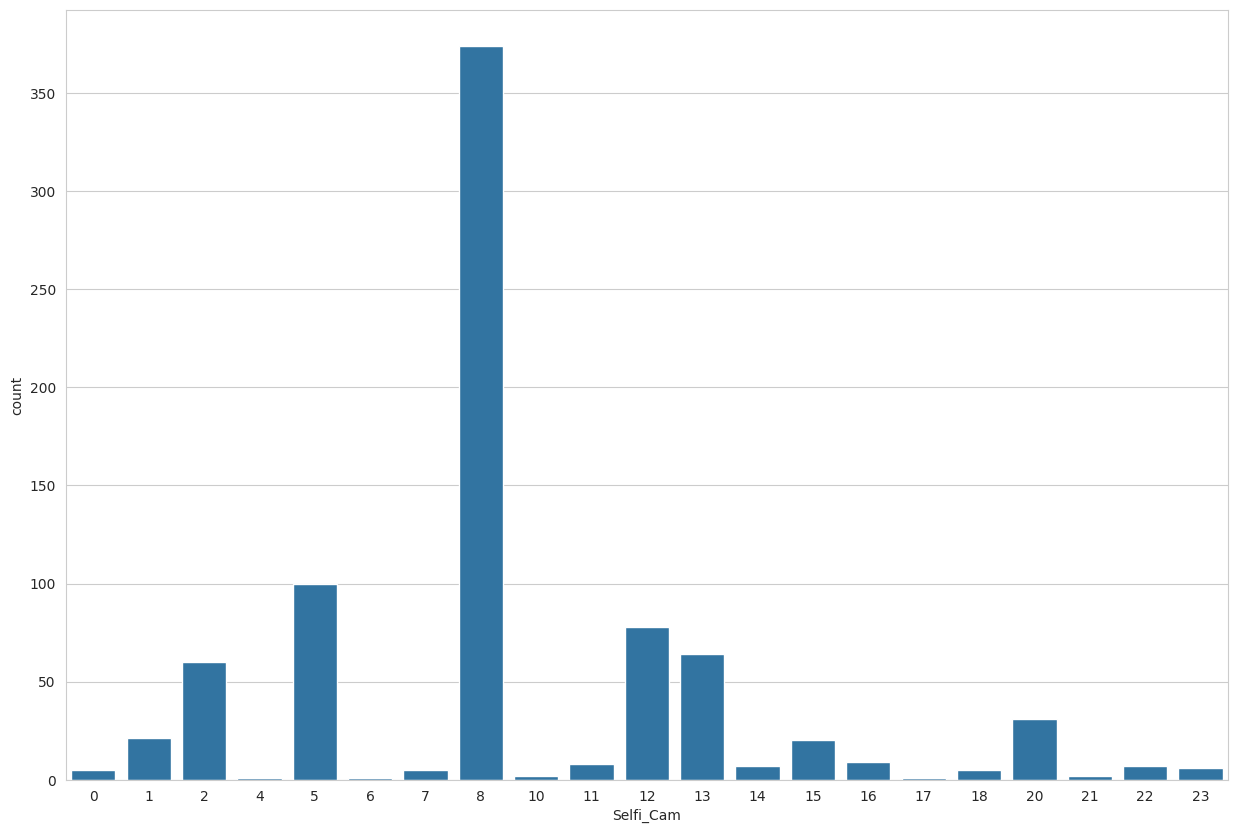

In [224]:
plt.figure(figsize=(15,10))
sns.set_style('whitegrid')
sns.countplot(x='Selfi_Cam',data=df)

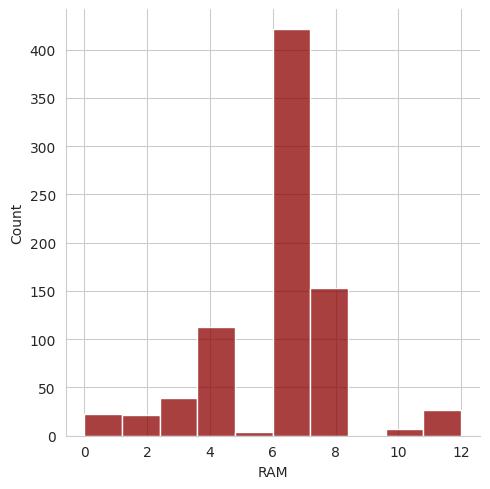

In [249]:
sns.displot(df['RAM'].dropna(),kde=False,color='darkred',bins=10)

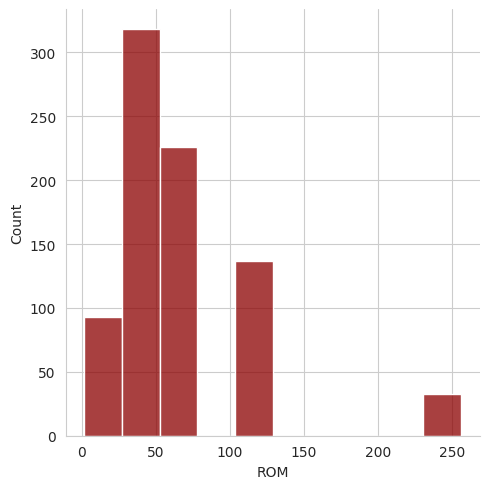

In [259]:
sns.displot(df['ROM'].dropna(),kde=False,color='darkred',bins=10)

<ipython-input-254-f2c6dcb787e5>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['ROM'].dropna(),kde=False,color='blue',bins=10)


<Axes: xlabel='ROM'>

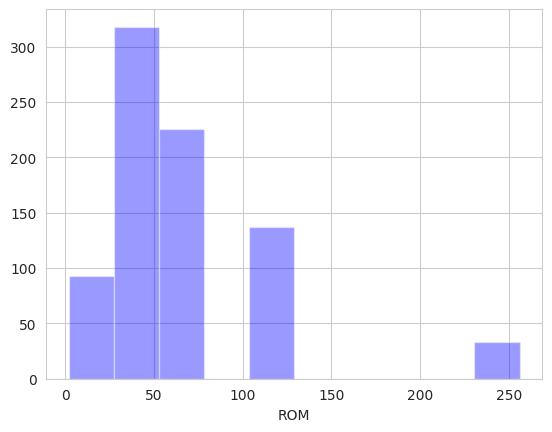

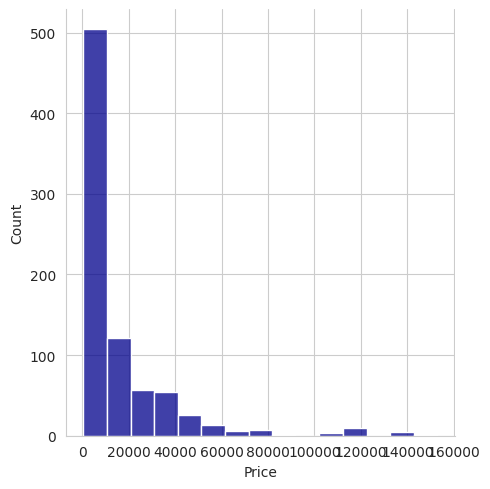

In [264]:
sns.displot(df['Price'].dropna(),kde=False,color='darkblue',bins=15)

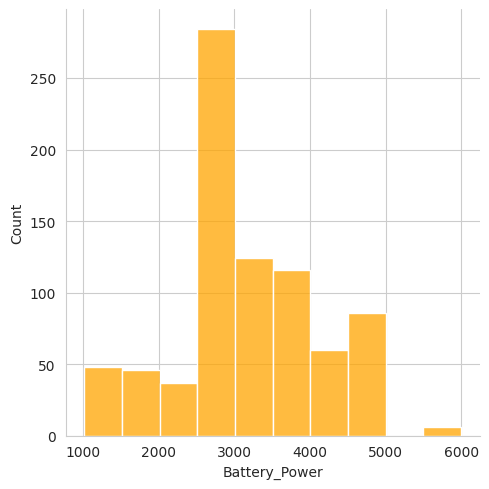

In [266]:
sns.displot(df['Battery_Power'].dropna(),kde=False,color='orange',bins=10)

<Figure size 1000x1000 with 0 Axes>

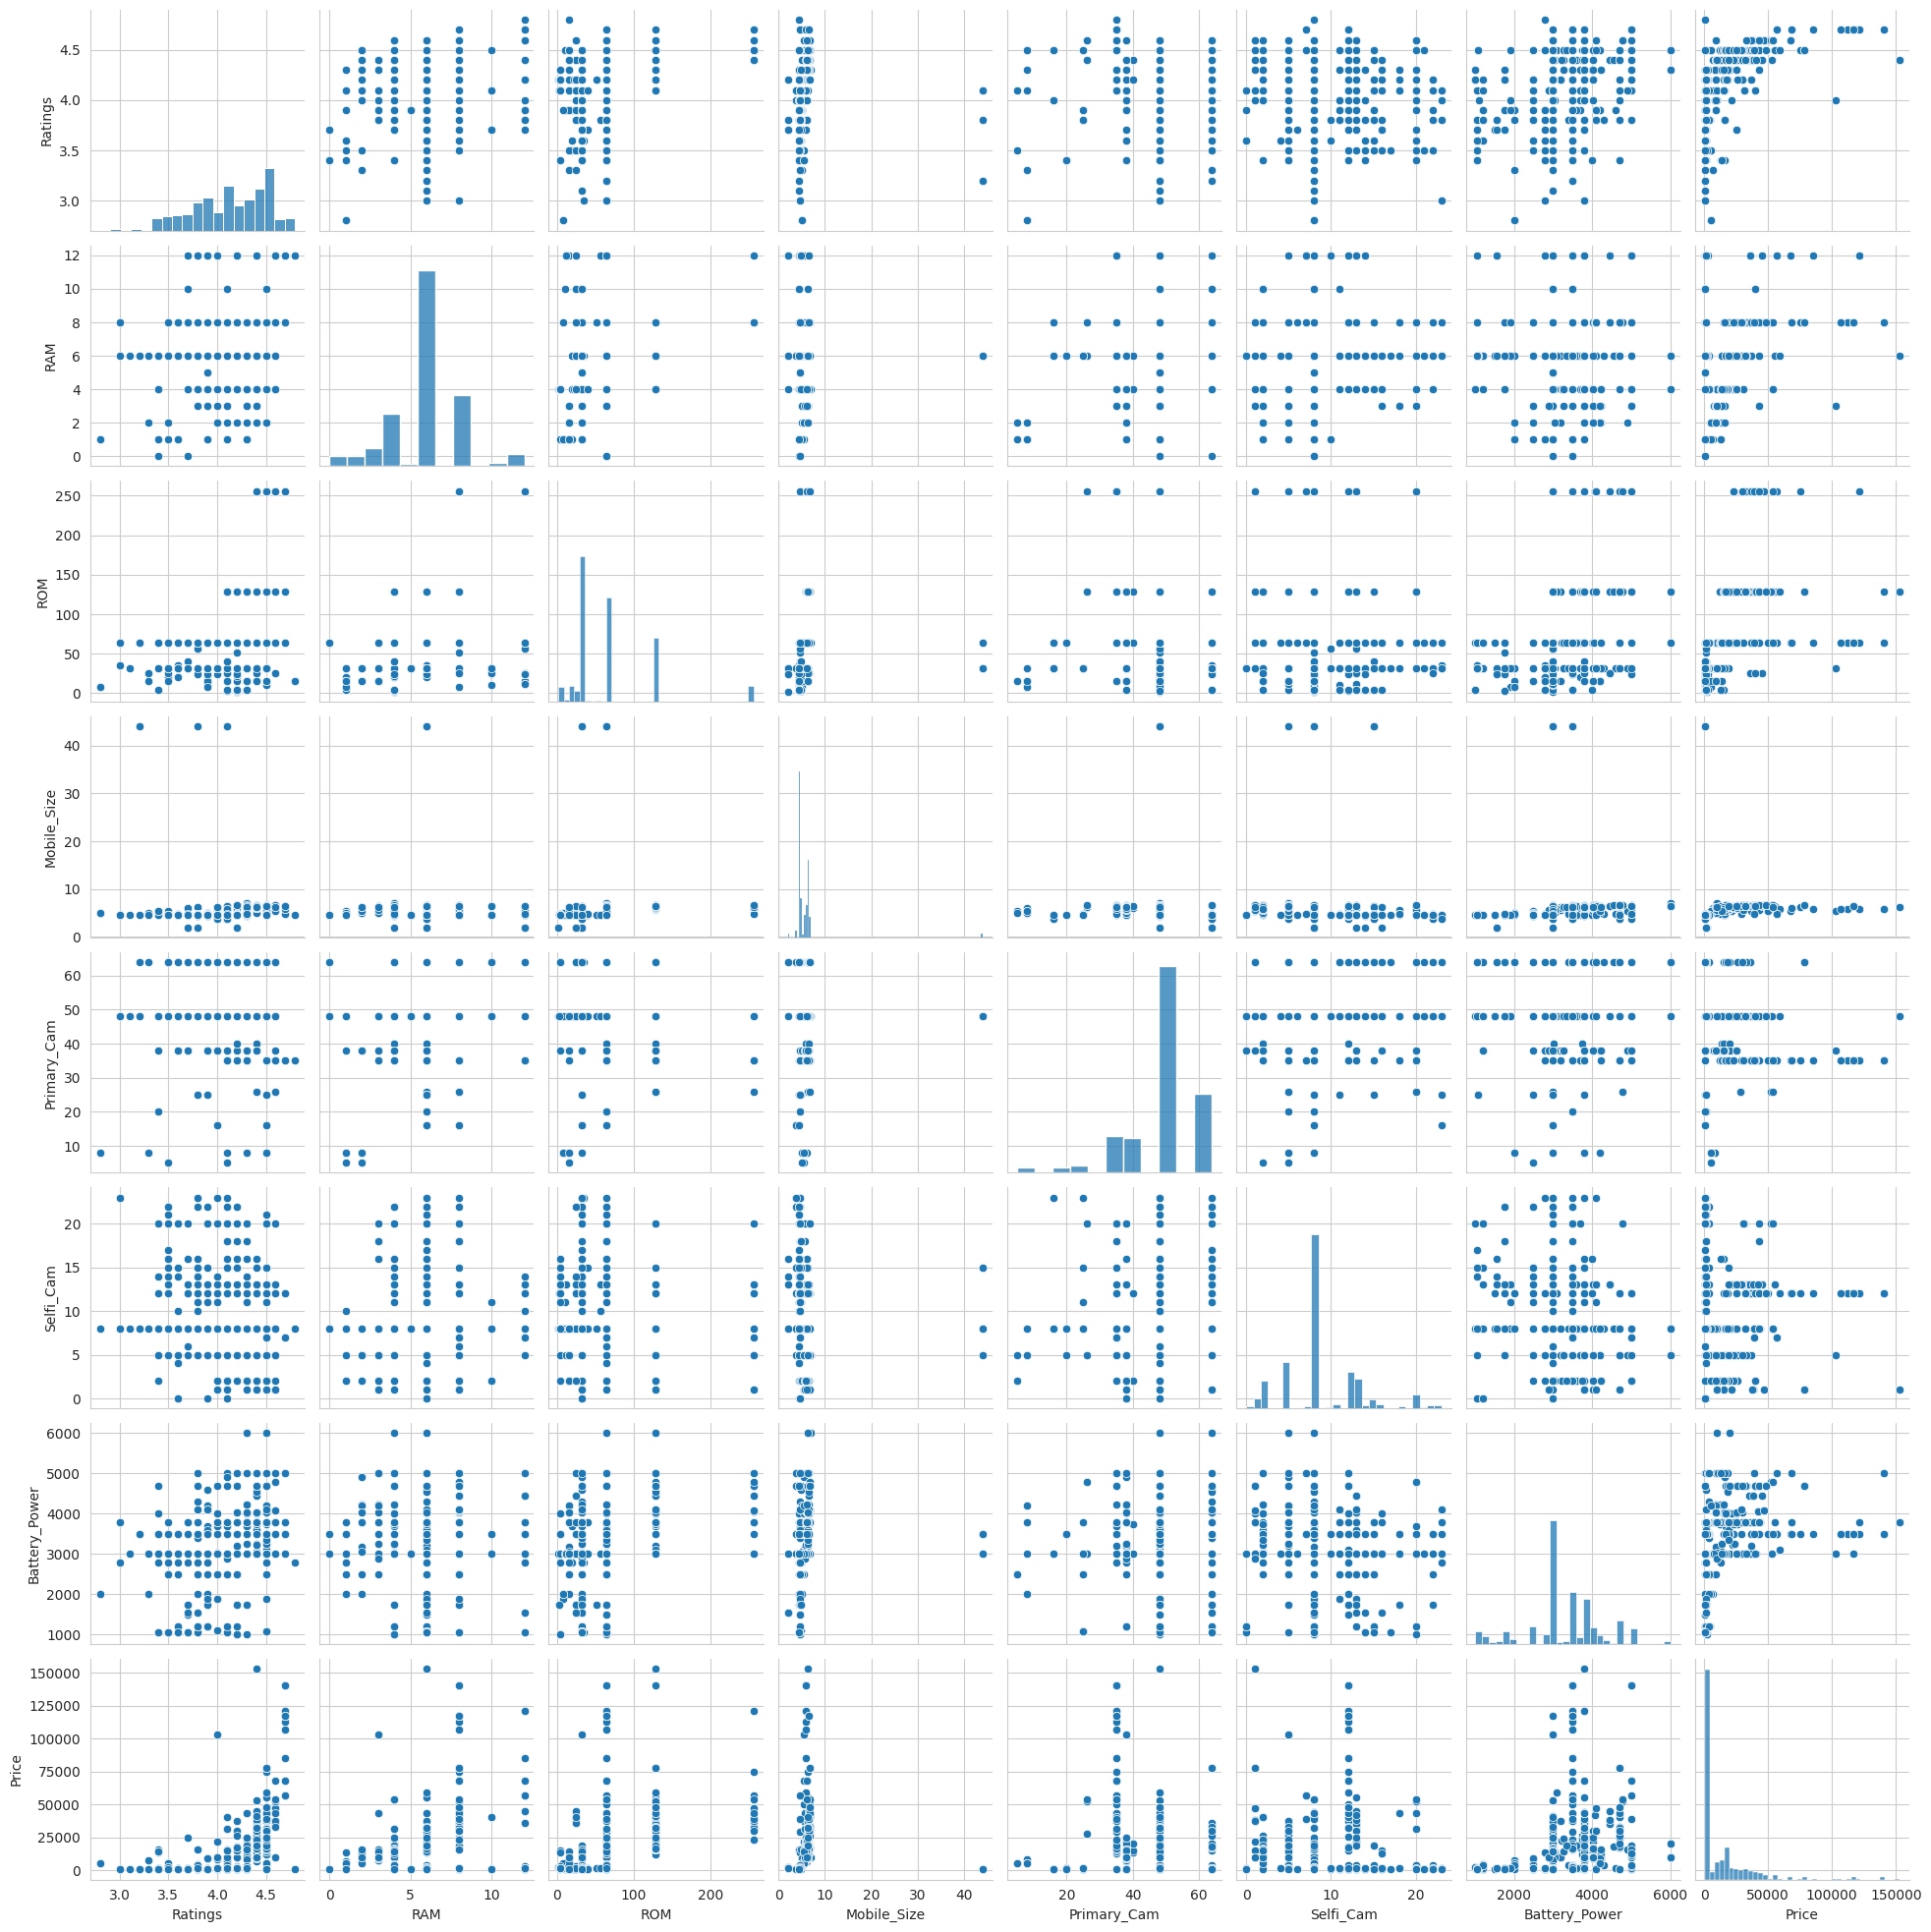

In [229]:
plt.figure(figsize=(10,10))
sns.pairplot(data=df)

In [230]:
#summary of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 807 entries, 0 to 835
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Ratings        807 non-null    float64
 1   RAM            807 non-null    int64  
 2   ROM            807 non-null    int64  
 3   Mobile_Size    807 non-null    float64
 4   Primary_Cam    807 non-null    int64  
 5   Selfi_Cam      807 non-null    int64  
 6   Battery_Power  807 non-null    int64  
 7   Price          807 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 56.7 KB


In [231]:
#describe
df.describe()

,Ratings,RAM,ROM,Mobile_Size,Primary_Cam,Selfi_Cam,Battery_Power,Price
count,807.000000,807.000000,807.000000,807.000000,807.000000,807.000000,807.000000,807.000000
mean,4.112639,5.941760,64.390335,5.620660,47.821561,8.868649,3278.859975,14269.167286
std,0.367830,2.056359,53.868626,3.957409,11.155916,4.547254,937.628801,23092.739983
min,2.800000,0.000000,2.000000,2.000000,5.000000,0.000000,1020.000000,479.000000
25%,3.900000,6.000000,32.000000,4.500000,48.000000,8.000000,3000.000000,984.000000
50%,4.100000,6.000000,32.000000,4.770000,48.000000,8.000000,3000.000000,1699.000000
75%,4.400000,6.000000,64.000000,6.300000,48.000000,12.000000,3800.000000,18994.500000
max,4.800000,12.000000,256.000000,44.000000,64.000000,23.000000,6000.000000,153000.000000


# now all columns are in float or int values and there are no NA values also we removed all autliers so the data is clear and now ready for your  ML Project


## Since we are trying to predict the price , we need to  use  Regression models as the models are good for predicting continuous variables
- ### **Linear Regression** : Linear regression is a statistical method used to model the relationship between a dependent variable (target) and one or more independent variables (predictors) by fitting a linear equation to the observed data.The simplest form is the equation y=mx + b, where y is the dependednt bariable, x is the independent variable, m is the slope, and b is the intercept
- ### **Random Forest Regressor** : It operates by constructing multiple decision trees during training and outputs the average of their predictions.
- ### **Gradien Boosting Regressor** : It builds an ensemble of weak prediction models, typically decision trees, in a sequential manner. Each new model attempts to correct the errors made by the previous models. The core idea is to optimize a loss function by iteratively adding new models that minimize this loss using gradient descent. The result is a strong predictive model that combines the strengths of multiple weak learners

In [232]:
# setting the random seed so each time the code is run the peformance  don't change
np.random.seed(50)

# Model Training
## IN this face we train the model using the 3 algorithms Listed above


# Spliting data into X and Y Variables
## splitting the data into feature(x) and target(y)

In [233]:
# assigning the feature (x) value
x = df.drop('Price', axis=1)
x.head()

,Ratings,RAM,ROM,Mobile_Size,Primary_Cam,Selfi_Cam,Battery_Power
0,4.3,4,128,6.00,48,13,4000
1,3.4,6,64,4.50,48,12,4000
2,4.3,4,4,4.50,64,16,4000
3,4.4,6,64,6.40,48,15,3800
4,4.5,6,128,6.18,35,15,3800


In [234]:
# assigning the target (y) value
y = df['Price']
y.head()

0    24999
1    15999
2    15000
3    18999
4    18999
Name: Price, dtype: int64

# 5.2 Splitting the data into training and testing set

In [235]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y , test_size=0.2)

In [236]:
print(f"x_train : {x_train.shape}, x_test : {x_test.shape} , y_train : {y_train.shape} , y_test: {y_test.shape}")

x_train : (645, 7), x_test : (162, 7) , y_train : (645,) , y_test: (162,)


**USING LINEAR REGRESSION**


In [237]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
# training the model
model.fit(x_train, y_train)

LinearRegression()

In [238]:
# peforming prediction on the testing set
y_pred = model.predict(x_test)

In [239]:
#EVALUATING LINEAR REGRESSION

from sklearn.metrics import mean_squared_error, r2_score , mean_absolute_error

mse = mean_squared_error(y_test, y_pred)
r2Score = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("Mean Squared Error : ", mse)
print("R2 score: ", r2Score)
print("Mean Absolute Error: ", mae)

Mean Squared Error :  246011564.28660122
R2 score:  0.5042839796353304
Mean Absolute Error:  9471.07799170855


In [281]:
#linear regression
#training score
print("Training Accuracy:",model.score(x_train,y_train)*100)
#testing score
print("Testing Accuracy:",model.score(x_test,y_test)*100)

Training Accuracy: 45.3181859699043
Testing Accuracy: 50.428397963533044


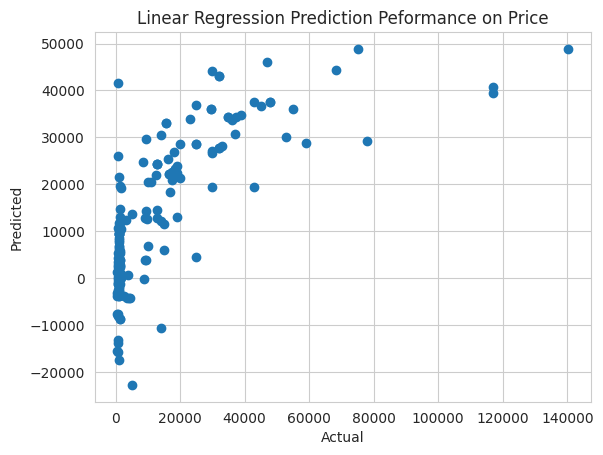

In [240]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Linear Regression Prediction Peformance on Price")
plt.show()

**USING RANDON FOREST REGRESSOR**

In [241]:
from sklearn.ensemble import RandomForestRegressor

model2 = RandomForestRegressor()
model2.fit(x_train, y_train)

model2.score(x_train, y_train)

0.9758588211427781

In [242]:
# predicting the price on the testing set
y2_pred = model2.predict(x_test)

In [279]:
#EVALUATING THE RANDOM FOREST REGRESSOR

from sklearn.metrics import mean_squared_error, r2_score , mean_absolute_error

mse = mean_squared_error(y_test, y2_pred)
r2Score = r2_score(y_test, y2_pred)
mae = mean_absolute_error(y_test, y2_pred)
print(" Random Forest Regressor Peformance : ")
print("Mean Squared Error : ", mse)
print("R2 score: ", r2Score)
print("Mean Absolute Error: ", mae)

 Random Forest Regressor Peformance : 
Mean Squared Error :  45222752.22773781
R2 score:  0.9088756545681921
Mean Absolute Error:  2333.512993756758


In [280]:
#randon forest regressor
#traning score
print("Training Accuracy:",model2.score(x_train,y_train)*100)
#testing score
print("Testing Accuracy:",model2.score(x_test,y_test)*100)

Training Accuracy: 97.58588211427781
Testing Accuracy: 90.8875654568192


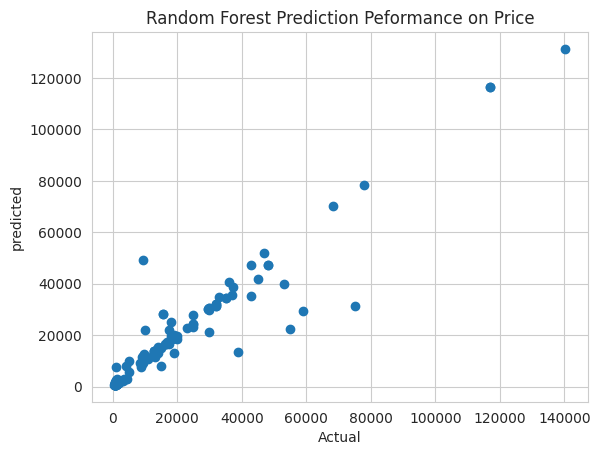

In [244]:
plt.scatter(y_test, y2_pred)
plt.xlabel("Actual")
plt.ylabel("predicted")
plt.title("Random Forest Prediction Peformance on Price")
plt.show()

**USING GRADIENT BOOSTING REGRESSOR**

In [245]:
from sklearn.ensemble import GradientBoostingRegressor
# Initialize Gradient Boosting Regressor
model3 = GradientBoostingRegressor(random_state=42)

# Fit the model
model3.fit(x_train, y_train)
model3.score(x_train, y_train)

0.9537103214857527

In [246]:
# predicting the price on the testing set
y3_pred = model3.predict(x_test)

In [278]:
#EVALUATING USING THE GRADIENT BOOSTING REGRESSOR

from sklearn.metrics import mean_squared_error, r2_score , mean_absolute_error

mse = mean_squared_error(y_test, y3_pred)
r2Score = r2_score(y_test, y3_pred)
mae = mean_absolute_error(y_test, y3_pred)
print("Gradien Boosting Regressor Peformance: ")
print("Mean Squared Error : ", mse)
print("R2 score: ", r2Score)
print("Mean Absolute Error: ", mae)

Gradien Boosting Regressor Peformance: 
Mean Squared Error :  44706975.34952456
R2 score:  0.9099149506769153
Mean Absolute Error:  3186.867492146994


In [277]:
#gradient bossting regressor
#taining score
print("Training Accuracy:",model3.score(x_train,y_train)*100)
#testing score
print("Testing Accuracy:",model3.score(x_test,y_test)*100)

Training Accuracy: 95.37103214857527
Testing Accuracy: 90.99149506769153


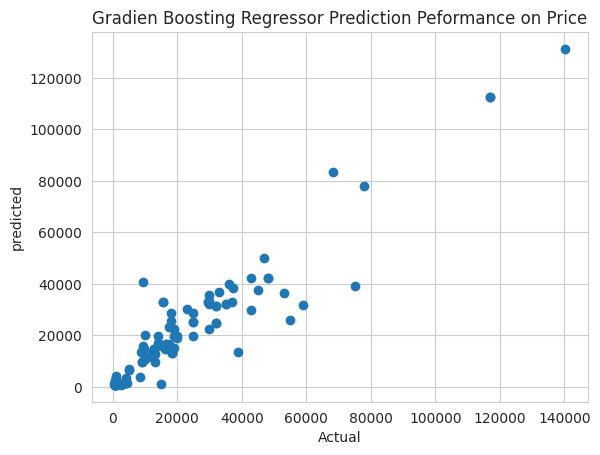

In [248]:
plt.scatter(y_test, y3_pred)
plt.xlabel("Actual")
plt.ylabel("predicted")
plt.title("Gradien Boosting Regressor Prediction Peformance on Price")
plt.show()